<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - AXS</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_AXS.csv')
df

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,45.097389,45.097389,47.908173,44.620983,46.146866,315254265.0
1822,2022-04-22,45.963348,45.963348,46.514893,44.898846,45.084476,293223333.0
1823,2022-04-23,45.180782,45.180782,46.072273,45.054134,45.955498,185825882.0
1824,2022-04-24,44.369541,44.369541,45.520817,44.332603,45.171925,171259555.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   AXS-USD_ADJCLOSE  538 non-null    float64
 2   AXS-USD_CLOSE     538 non-null    float64
 3   AXS-USD_HIGH      538 non-null    float64
 4   AXS-USD_LOW       538 non-null    float64
 5   AXS-USD_OPEN      538 non-null    float64
 6   AXS-USD_VOLUME    538 non-null    float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
AXS-USD_ADJCLOSE,1288
AXS-USD_CLOSE,1288
AXS-USD_HIGH,1288
AXS-USD_LOW,1288
AXS-USD_OPEN,1288
AXS-USD_VOLUME,1288


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AXS-USD_ADJCLOSE,538.0,4.368895e+01,4.521039e+01,0.135104,3.787297e+00,4.237009e+01,6.965252e+01,1.603593e+02
AXS-USD_CLOSE,538.0,4.368895e+01,4.521039e+01,0.135104,3.787297e+00,4.237009e+01,6.965252e+01,1.603593e+02
AXS-USD_HIGH,538.0,4.606852e+01,4.751994e+01,0.149547,4.056442e+00,4.493683e+01,7.382753e+01,1.653691e+02
AXS-USD_LOW,538.0,4.164627e+01,4.345773e+01,0.123431,3.386940e+00,3.822049e+01,6.694265e+01,1.542171e+02
AXS-USD_OPEN,538.0,4.362574e+01,4.527274e+01,0.135104,3.740667e+00,4.228959e+01,6.962919e+01,1.606206e+02
AXS-USD_VOLUME,538.0,4.358642e+08,7.423602e+08,579626.000000,2.186772e+07,2.372675e+08,5.276080e+08,6.680962e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
397,2018-05-28,NaN,NaN,NaN,NaN,NaN,NaN
1465,2021-04-30,10.184638,10.184638,10.279739,9.458164,10.135303,52297377.0
667,2019-02-22,NaN,NaN,NaN,NaN,NaN,NaN
1290,2020-11-06,0.143164,0.143164,0.149547,0.123431,0.135104,3148629.0
1450,2021-04-15,8.027118,8.027118,8.106091,7.516819,7.712950,41080548.0
755,2019-05-21,NaN,NaN,NaN,NaN,NaN,NaN
965,2019-12-17,NaN,NaN,NaN,NaN,NaN,NaN
419,2018-06-19,NaN,NaN,NaN,NaN,NaN,NaN
1452,2021-04-17,7.817194,7.817194,8.056822,7.368367,7.437585,58044269.0
35,2017-05-31,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1283,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN
1284,2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN
1285,2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN
1286,2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
0,2020-11-04,0.145949,0.145949,0.191121,0.141809,0.179801,16344570.0
1,2020-11-05,0.135104,0.135104,0.150565,0.126469,0.145951,4948417.0
2,2020-11-06,0.143164,0.143164,0.149547,0.123431,0.135104,3148629.0
3,2020-11-07,0.141056,0.141056,0.168470,0.134455,0.143189,1987416.0
4,2020-11-08,0.198251,0.198251,0.239455,0.139401,0.141021,9484360.0
...,...,...,...,...,...,...,...
533,2022-04-21,45.097389,45.097389,47.908173,44.620983,46.146866,315254265.0
534,2022-04-22,45.963348,45.963348,46.514893,44.898846,45.084476,293223333.0
535,2022-04-23,45.180782,45.180782,46.072273,45.054134,45.955498,185825882.0
536,2022-04-24,44.369541,44.369541,45.520817,44.332603,45.171925,171259555.0


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME
0,2020-11-04,0.145949,0.145949,0.191121,0.141809,0.179801,16344570.0
1,2020-11-05,0.135104,0.135104,0.150565,0.126469,0.145951,4948417.0
2,2020-11-06,0.143164,0.143164,0.149547,0.123431,0.135104,3148629.0
3,2020-11-07,0.141056,0.141056,0.168470,0.134455,0.143189,1987416.0
4,2020-11-08,0.198251,0.198251,0.239455,0.139401,0.141021,9484360.0
...,...,...,...,...,...,...,...
533,2022-04-21,45.097389,45.097389,47.908173,44.620983,46.146866,315254265.0
534,2022-04-22,45.963348,45.963348,46.514893,44.898846,45.084476,293223333.0
535,2022-04-23,45.180782,45.180782,46.072273,45.054134,45.955498,185825882.0
536,2022-04-24,44.369541,44.369541,45.520817,44.332603,45.171925,171259555.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2020-11-04,0.145949,0.145949,0.191121,0.141809,0.179801,16344570.0,23.194400,34.773530
1,2020-11-05,0.135104,0.135104,0.150565,0.126469,0.145951,4948417.0,8.028631,19.052888
2,2020-11-06,0.143164,0.143164,0.149547,0.123431,0.135104,3148629.0,5.629903,21.158379
3,2020-11-07,0.141056,0.141056,0.168470,0.134455,0.143189,1987416.0,1.512163,25.298428
4,2020-11-08,0.198251,0.198251,0.239455,0.139401,0.141021,9484360.0,28.867445,71.774229


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

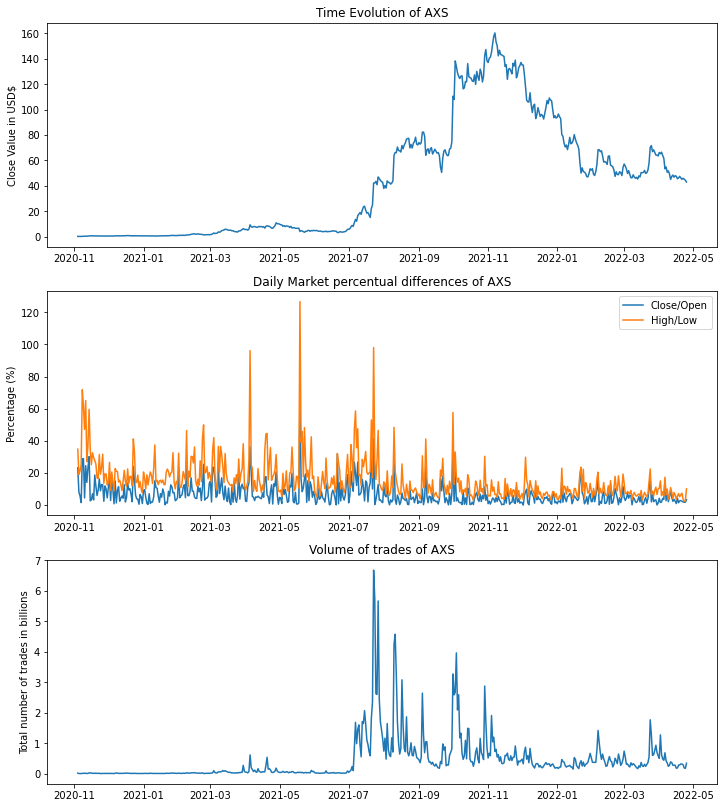

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-10-01'] # 2021-07-01
df

,Date,AXS-USD_ADJCLOSE,AXS-USD_CLOSE,AXS-USD_HIGH,AXS-USD_LOW,AXS-USD_OPEN,AXS-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
331,2021-10-01,110.539093,110.539093,117.026787,74.249603,74.611092,3.272757e+09,32.502530,57.612676
332,2021-10-02,107.941734,107.941734,119.921448,106.400620,110.410843,2.587818e+09,2.287446,12.707471
333,2021-10-03,138.318146,138.318146,138.318146,103.990822,107.963425,2.673087e+09,21.945581,33.009955
334,2021-10-04,133.951370,133.951370,155.084488,131.956909,137.372620,3.964783e+09,2.554098,17.526614
335,2021-10-05,128.987259,128.987259,145.702011,127.531685,134.723068,2.090557e+09,4.446803,14.247696
...,...,...,...,...,...,...,...,...,...
533,2022-04-21,45.097389,45.097389,47.908173,44.620983,46.146866,3.152543e+08,2.327134,7.366914
534,2022-04-22,45.963348,45.963348,46.514893,44.898846,45.084476,2.932233e+08,1.912115,3.599306
535,2022-04-23,45.180782,45.180782,46.072273,45.054134,45.955498,1.858259e+08,1.714701,2.259812
536,2022-04-24,44.369541,44.369541,45.520817,44.332603,45.171925,1.712596e+08,1.808410,2.680225


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(10, df)
windowed_df['Date'] = df.iloc[10:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue_8daysBefore,closeValue_9daysBefore,closeValue_10daysBefore,closeValue,Date
0,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,133.951370,138.318146,107.941734,110.539093,117.017021,2021-10-11
1,117.017021,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,133.951370,138.318146,107.941734,122.065582,2021-10-12
2,122.065582,117.017021,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,133.951370,138.318146,121.766754,2021-10-13
3,121.766754,122.065582,117.017021,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,133.951370,136.212082,2021-10-14
4,136.212082,121.766754,122.065582,117.017021,116.322701,126.545799,126.367287,124.509331,126.216606,128.987259,125.787872,2021-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...
192,46.147995,47.441418,46.212879,45.541279,47.501385,47.938419,46.771194,48.443615,47.346897,45.047264,45.097389,2022-04-21
193,45.097389,46.147995,47.441418,46.212879,45.541279,47.501385,47.938419,46.771194,48.443615,47.346897,45.963348,2022-04-22
194,45.963348,45.097389,46.147995,47.441418,46.212879,45.541279,47.501385,47.938419,46.771194,48.443615,45.180782,2022-04-23
195,45.180782,45.963348,45.097389,46.147995,47.441418,46.212879,45.541279,47.501385,47.938419,46.771194,44.369541,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((197,), (197, 10, 1), (197,))

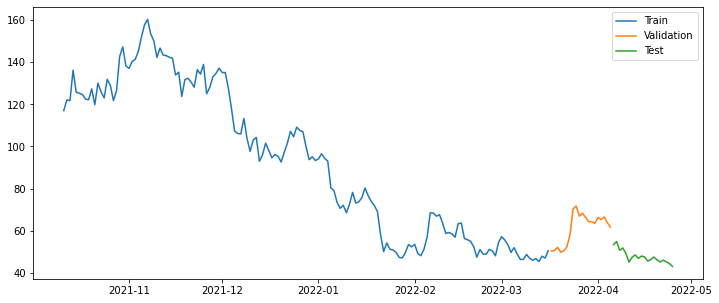

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [ ]:
#!pip install tensorflow

In [19]:
import os
os.environ['PYTHONHASHSEED']= '0'
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

# Function to create LSTM model and compute the MSE value for the given parameters
def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
    
    # create model
    model = Sequential([layers.Input((10, 1)),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])
    # Compile model
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
    
    test_predictions = model.predict(X_test).flatten()
    
    LSTM_mse = mean_squared_error(y_test, test_predictions)
    
    return LSTM_mse

#Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
    
    best_score = float('inf')
    
    for b in batch_size:
        for e in epochs:
            for l in learn_rate:
                print('Batch Size: ' + str(b))
                print('Number of Epochs: ' + str(e))
                print('Value of Learning Rate: ' + str(l))
                try:
                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
                    print('MSE=%.3f' % (mse))
                    if mse < best_score:
                        best_score = mse
                        top_params = [b, e, l]
                except:
                    continue
                    
    print('Best MSE=%.3f' % (best_score))
    print('Optimal Batch Size: ' + str(top_params[0]))
    print('Optimal Number of Epochs: ' + str(top_params[1]))
    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
                        

# define parameters
batch_size = [10, 100, 1000]
epochs = [50, 100]
learn_rate = np.linspace(0.001,0.1, num=10)

warnings.filterwarnings("ignore")
search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Epoch 1/100
1/1 - 3s - loss: 9994.7031 - mean_absolute_error: 93.5130 - val_loss: 3783.2944 - val_mean_absolute_error: 61.0782 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 9885.5801 - mean_absolute_error: 92.9166 - val_loss: 3746.6431 - val_mean_absolute_error: 60.7778 - 231ms/epoch - 231ms/step
Epoch 3/100
1/1 - 0s - loss: 9822.8906 - mean_absolute_error: 92.5870 - val_loss: 3706.0222 - val_mean_absolute_error: 60.4421 - 281ms/epoch - 281ms/step
Epoch 4/100
1/1 - 0s - loss: 9777.2607 - mean_absolute_error: 92.3198 - val_loss: 3666.0808 - val_mean_absolute_error: 60.1076 - 293ms/epoch - 293ms/step
Epoch 5/100
1/1 - 0s - loss: 9720.9316 - mean_absolute_error: 92.0090 - val_loss: 3620.7402 - val_mean_absolute_error: 59.7309 - 246ms/epoch - 246ms/step
Epoch 6/100
1/1 - 0s - loss: 9659.4473 - mean_absolute_error: 91.6641 - val_loss: 3572.3608 - val_mean_absolute_error: 59.3258 - 326ms/epoch - 326ms/step
Epoch 7/100
1/1 - 0s - loss: 9570.1533 - mean_absolute_error: 91.1918 - val_loss: 

Epoch 55/100
1/1 - 0s - loss: 1335.6194 - mean_absolute_error: 32.4502 - val_loss: 565.8837 - val_mean_absolute_error: 22.6597 - 45ms/epoch - 45ms/step
Epoch 56/100
1/1 - 0s - loss: 1313.8169 - mean_absolute_error: 32.3072 - val_loss: 618.3234 - val_mean_absolute_error: 23.7861 - 44ms/epoch - 44ms/step
Epoch 57/100
1/1 - 0s - loss: 1290.2756 - mean_absolute_error: 32.1387 - val_loss: 684.4559 - val_mean_absolute_error: 25.1372 - 43ms/epoch - 43ms/step
Epoch 58/100
1/1 - 0s - loss: 1267.3866 - mean_absolute_error: 31.9587 - val_loss: 762.7048 - val_mean_absolute_error: 26.6496 - 42ms/epoch - 42ms/step
Epoch 59/100
1/1 - 0s - loss: 1246.1259 - mean_absolute_error: 31.7490 - val_loss: 848.8169 - val_mean_absolute_error: 28.2206 - 45ms/epoch - 45ms/step
Epoch 60/100
1/1 - 0s - loss: 1229.7729 - mean_absolute_error: 31.5336 - val_loss: 937.8380 - val_mean_absolute_error: 29.7564 - 48ms/epoch - 48ms/step
Epoch 61/100
1/1 - 0s - loss: 1218.3180 - mean_absolute_error: 31.3142 - val_loss: 1025.

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [ ]:
#BEST SOLUTION OF THE MODEL

# MSE=20.904
# Batch Size: 10
# Number of Epochs: 100
# Value of Learning Rate: 0.001

model = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=10, verbose=2)

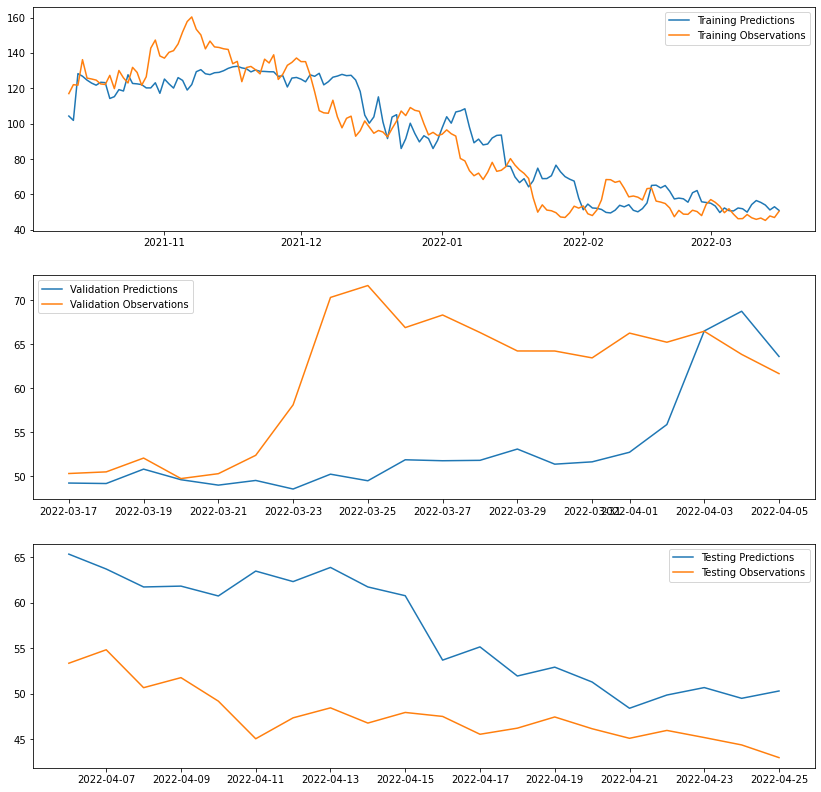

In [21]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [22]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

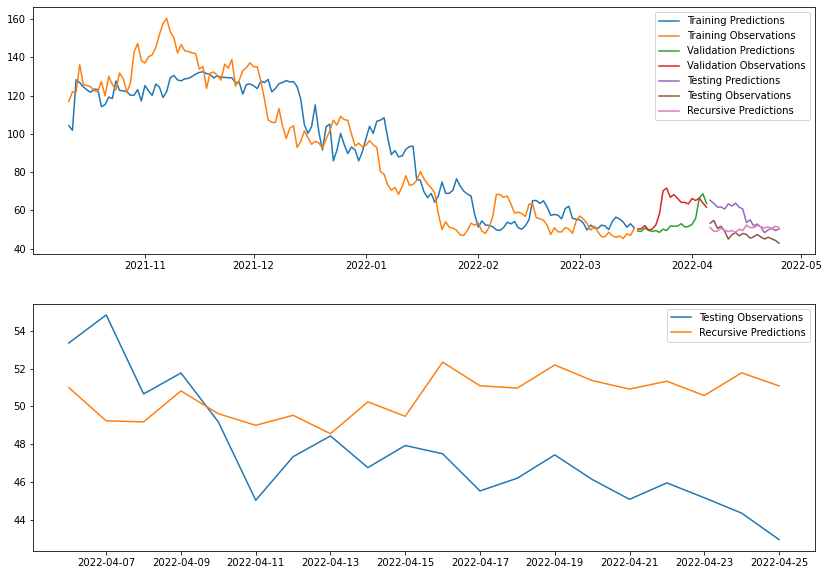

In [23]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')